### categorize data by label

In [ ]:
activities = ['Walking', 'Running', 'Commute in bus', 'Eating using fork and spoon', 
             'Using mobile phone(texting)', 'Working on laptop', 'Sitting', 'Washing hands',
             'Eating with hand', 'Conversing while sitting', 'Elevator', 'Opening door',
             'Standing', 'Climbing upstairs', 'Running']
columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Label']

In [144]:
import glob
import pandas
def categorize():
    files = glob.glob("../DataSet/*Accelerometer.csv")
    data = pd.DataFrame()
    for name in files:
        data = data.append(pd.read_csv(name, usecols = columns))
    for i in range(len(activities)):
        tmp = data.loc[data['Label'] == i]
        tmp.to_csv("./categorized_data/" + activities[i] + ".csv", index=False)

In [145]:
categorize()

In [170]:
def get_raw_data(activity):
    return pd.read_csv("./categorized_data/" + activity + ".csv")

### create segments

In [205]:
from tqdm import tqdm
def totoal_a(accs):
    import numpy as np
#     for i in range(len(accs)):
#         accs[i] = (accs[i]  * 3.0 / 63.0 - 1.5) * 9.8
    return np.sqrt(np.sum(map(lambda x: np.square(x), accs)))
    
def create_segs(data, duration):
    data = data.iloc[:, :3] # get x, y, z acceleration
    result = []
    for index, row in data.iterrows():
        result.append(totoal_a(list(row)[:3]))
    segs = []
    length = len(result)
    for i in tqdm(range(0, length, 32 * duration)):
        if i + duration * 32 <= length:
            segs.append(result[i:i + duration * 32])
    return segs

### calculate the medoid value
with the calculation of the distance of all the segementations

#### calculate the distance of 2 segments

In [300]:
# assume that each segment length is 5 second
import relaxed_dtw_v1
import numpy as np

def distance(seg1, seg2):
    result = 0.0;
    dist = lambda x,y : np.abs(x - y)
    distance, matrix = relaxed_dtw_v1.relaxed_dtw(seg1, seg2, distance=dist, r=16)
    return distance
        
def find_medoid_seg(segs):
    length = len(segs)
    result = [0 for i in range(length)]
    table = [[-1 for i in range(length)] for i in range(length)]
    for i in tqdm(range(length)):
        for j in range(length):
            if i == j: continue
            elif table[j][i] != -1:
                result[i] += table[j][i]
            else:
                table[i][j] = distance(segs[i], segs[j])
                result[i] += table[i][j]
    min_medoid = min(result)
    for i in range(len(result)):
        if min_medoid == result[i]:
            return segs[i], min_medoid

In [278]:
medoids = []
represent = []
for i in range(4):
    segs = create_segs(get_raw_data(activities[i]), 5)
    seg, medoid = find_medoid_seg(random.sample(segs, int(len(segs)/3)))
    represent.append(seg)
    medoids.append(medoid)







  0%|          | 0/319 [00:00<?, ?it/s]





100%|██████████| 319/319 [00:00<00:00, 117408.12it/s]





  0%|          | 0/106 [00:00<?, ?it/s]





  1%|          | 1/106 [00:08<14:51,  8.49s/it]





  2%|▏         | 2/106 [00:16<14:19,  8.27s/it]





  3%|▎         | 3/106 [00:25<14:30,  8.45s/it]





  4%|▍         | 4/106 [00:33<14:13,  8.37s/it]





  5%|▍         | 5/106 [00:42<14:36,  8.68s/it]





  6%|▌         | 6/106 [00:52<15:04,  9.04s/it]





  7%|▋         | 7/106 [01:02<15:29,  9.39s/it]





  8%|▊         | 8/106 [01:11<15:10,  9.29s/it]





  8%|▊         | 9/106 [01:19<14:25,  8.92s/it]





  9%|▉         | 10/106 [01:28<14:02,  8.77s/it]





 10%|█         | 11/106 [01:36<13:40,  8.64s/it]





 11%|█▏        | 12/106 [01:44<13:18,  8.50s/it]





 12%|█▏        | 13/106 [01:53<13:12,  8.52s/it]





 13%|█▎        | 14/106 [02:02<13:27,  8.77s/it]





 14%|█▍        | 15/106 [02:11<13:09,  8.68s/it]





 15%|█▌        | 16/106 [02:19<12:40,  8.45s

100%|██████████| 195/195 [00:00<00:00, 25627.92it/s]





  0%|          | 0/64 [00:00<?, ?it/s]





  2%|▏         | 1/64 [00:05<05:41,  5.42s/it]





  3%|▎         | 2/64 [00:10<05:32,  5.36s/it]





  5%|▍         | 3/64 [00:15<05:25,  5.34s/it]





  6%|▋         | 4/64 [00:20<05:07,  5.12s/it]





  8%|▊         | 5/64 [00:26<05:17,  5.38s/it]





  9%|▉         | 6/64 [00:33<05:45,  5.95s/it]





 11%|█         | 7/64 [00:38<05:23,  5.68s/it]





 12%|█▎        | 8/64 [00:43<04:56,  5.30s/it]





 14%|█▍        | 9/64 [00:47<04:40,  5.09s/it]





 16%|█▌        | 10/64 [00:53<04:38,  5.15s/it]





 17%|█▋        | 11/64 [00:57<04:22,  4.95s/it]





 19%|█▉        | 12/64 [01:02<04:11,  4.84s/it]





 20%|██        | 13/64 [01:06<04:05,  4.81s/it]





 22%|██▏       | 14/64 [01:11<04:00,  4.82s/it]





 23%|██▎       | 15/64 [01:16<03:51,  4.73s/it]





 25%|██▌       | 16/64 [01:21<03:50,  4.81s/it]





 27%|██▋       | 17/64 [01:26<03:44,  4.78s/it]





 28%|█

In [282]:
medoids

[2.1114814044904855, 0, 1.036876041175313, 0.9204472023154509]

In [301]:
segs = create_segs(get_raw_data(activities[0]), 5)
import random
medoid_seg, min_medoid = find_medoid_seg(random.sample(segs, 50))







  0%|          | 0/319 [00:00<?, ?it/s]





100%|██████████| 319/319 [00:00<00:00, 80781.44it/s]





  0%|          | 0/50 [00:00<?, ?it/s]





  2%|▏         | 1/50 [00:04<03:52,  4.75s/it]





  4%|▍         | 2/50 [00:09<03:45,  4.71s/it]





  6%|▌         | 3/50 [00:13<03:38,  4.64s/it]





  8%|▊         | 4/50 [00:17<03:26,  4.48s/it]





 10%|█         | 5/50 [00:21<03:09,  4.20s/it]





 12%|█▏        | 6/50 [00:25<03:04,  4.19s/it]





 14%|█▍        | 7/50 [00:29<02:55,  4.08s/it]





 16%|█▌        | 8/50 [00:32<02:44,  3.91s/it]





 18%|█▊        | 9/50 [00:36<02:34,  3.77s/it]





 20%|██        | 10/50 [00:39<02:24,  3.61s/it]





 22%|██▏       | 11/50 [00:42<02:17,  3.52s/it]





 24%|██▍       | 12/50 [00:45<02:06,  3.33s/it]





 26%|██▌       | 13/50 [00:48<01:57,  3.18s/it]





 28%|██▊       | 14/50 [00:51<01:51,  3.09s/it]





 30%|███       | 15/50 [00:54<01:47,  3.07s/it]





 32%|███▏      | 16/50 [00:57<01:40,  2.96s/it]





 34%|███

In [302]:
min_medoid

362.71405164966234

In [255]:
# get the representation seg for activity 0
segs = create_segs(get_raw_data(activities[0]), 5)
import random
medoid_seg = find_medoid_seg(random.sample(segs, 100))





  0%|          | 0/319 [00:00<?, ?it/s]



100%|██████████| 319/319 [00:00<00:00, 40328.63it/s]



  0%|          | 0/100 [00:00<?, ?it/s]



  1%|          | 1/100 [00:10<17:23, 10.54s/it]



  2%|▏         | 2/100 [00:19<16:15,  9.95s/it]



  3%|▎         | 3/100 [00:29<16:16, 10.07s/it]



  4%|▍         | 4/100 [00:44<18:24, 11.51s/it]



  5%|▌         | 5/100 [00:52<16:27, 10.39s/it]



  6%|▌         | 6/100 [00:58<14:37,  9.33s/it]



  7%|▋         | 7/100 [01:06<13:45,  8.88s/it]



  8%|▊         | 8/100 [01:15<13:27,  8.78s/it]



  9%|▉         | 9/100 [01:22<12:41,  8.36s/it]



 10%|█         | 10/100 [01:29<11:53,  7.93s/it]



 11%|█         | 11/100 [01:37<11:53,  8.02s/it]



 12%|█▏        | 12/100 [01:45<11:24,  7.78s/it]



 13%|█▎        | 13/100 [01:52<11:06,  7.66s/it]



 14%|█▍        | 14/100 [01:59<10:42,  7.47s/it]



 15%|█▌        | 15/100 [02:06<10:16,  7.26s/it]



 16%|█▌        | 16/100 [02:14<10:38,  7.60s/it]



 17%|█▋        | 17/100 [02:22<

In [241]:
medoids

[1.8205572332284436, 0.5702441827143454]

In [267]:
medoid_seg[1]

3.4795909460677947

In [266]:
medoid_seg
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='mr_lancelot', api_key='WJcSyvZ1Ne3mTosBtlwc')
import plotly.graph_objs as go
trace0 = go.Scatter(
    y=medoid_seg[0]
)
data = [trace0]
py.iplot(data)

In [271]:
trace0 = go.Scatter(
    y=medoid_seg
)
data = [trace0]
py.iplot(data)

#### use medoid to classify the activity

In [295]:
def classify(medoids, seg):
    dist = [-1 for i in range(len(medoids))]
    for i in range(len(medoids)):
        dist[i] = distance(medoids[i], seg)
    tmp = dist[0]
    index = 0
    return dist

In [296]:
classify(represent, medoid_seg)

[21.631699049505116, 8.742068157710257, 18.329865376346646, 18.62680766720654]

In [ ]:
import relaxed_dtw_v1
import numpy as np

dist = lambda x,y : np.abs(x-y)
x = np.array([[1,2,3], 1, 2, 3, 2, 0])
y = np.array([[2,3,4], 2, 3, 4, 3, 1])
distance,DTW_matrix = relaxed_dtw_v1.relaxed_dtw(x, y, distance=dist, r=4)
distance

In [ ]:
def totoal_a(accs):
    import numpy as np
    return np.sqrt(np.sum(map(lambda x: np.square(x), accs)))
l = [1,2,3]
totoal_a(l)

In [171]:
import pandas as pd
data = get_raw_data(activities[0])
segs = create_segs(data, 5)

100%|██████████| 319/319 [00:00<00:00, 46603.38it/s]


In [190]:
import networkx as nx
import numpy as np
import string

dt = [('len', float)]
A = np.array([(0, 1,2,3),
               (1, 0, 0.9, 0.2),
               (2, 0.9, 0, 0.1),
               (3, 0.2, 0.1, 0)
               ]) * 20
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.drawing.nx_agraph.to_agraph(G)

# G.node_attr.update(color="red", style="filled")
# G.edge_attr.update(color="blue", width="2.0")

G.draw('./out.png', format='png', prog='neato')

In [314]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
A = np.array([(0, 1,2,3),
               (1, 0, 0.9, 0.2),
               (2, 0.9, 0, 0.1),
               (3, 0.2, 0.1, 0)
               ]) * 20
pca = PCA(n_components=2)
X2d = pca.fit_transform(A)
X2d

array([[ 58.91121437,  -5.99548056],
       [ -2.64637306,  19.10169791],
       [-21.17254535,  -4.03570441],
       [-35.09229595,  -9.07051294]])

[[-5.75393585e+01  8.16496429e-01]
 [-5.81244262e+01 -8.13747648e-01]
 [ 1.15663785e+02 -2.74878088e-03]]


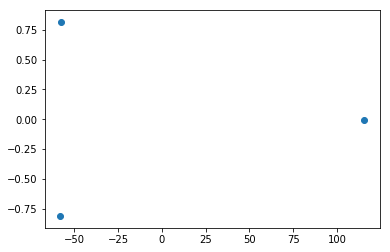

In [324]:
A = np.array([(0, 1, 100),
               (1, 0, 101),
               (100, 101, 0)
               ])
pca = PCA(n_components=2)
X2d = pca.fit_transform(A)
print X2d
x, y = np.array(X2d).T
plt.scatter(x,y)
plt.show();